# Data Science Playbook
This playbook documents the machine learning building steps for a classification model.

## Problem Statement

Using a generate dataset set build a complete steps to build a machine learning model with workable code.

## Set Up Environment

### Import Modules

In [1]:
# Import Modules
import pandas as pd
import numpy as np


from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [2]:
# Load Data
df = pd.read_csv("cc_approvals.data", header=None)

In [3]:
# Show the fields and data types of the data frame
print(df.info())

# Show Head
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None
  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g

### Define the target variable

In [4]:
## Define the target variable in the df
df['target'] = np.where(df[15]=='+', 1, 0)
target = 'target'
print(f'The target variable is {target}')

# Drop df[15] as the target has been converted
df.drop(15, axis=1, inplace=True)

The target variable is target


Frequency of the target
The target variable contains 2 unique values
0    383
1    307
Name: target, dtype: int64


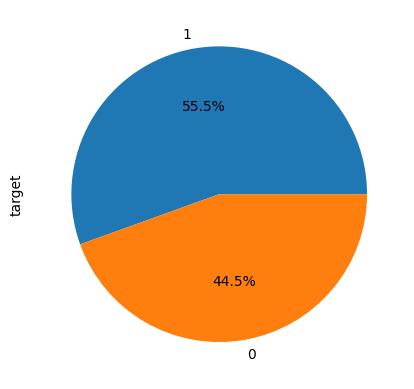

In [5]:
# Show the frequency of the target variable
df[target].value_counts(normalize=True).plot.pie(labels=df[target].unique(), autopct="%1.1f%%")

# Print Frequency
print('Frequency of the target')
print('The target variable contains {} unique values'.format(len(df[target].unique())))
print(df[target].value_counts())

## EDA for Data Quality
Exploratory Data Analysis (EDA) to assess the quality of the data and generate awareness of the data

In [6]:
# Show statisitcs for the df numeric
df.describe()

,2,7,10,14,target
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928
std,4.978163,3.346513,4.86294,5210.102598,0.497318
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,0.000000
50%,2.750000,1.000000,0.00000,5.000000,0.000000
75%,7.207500,2.625000,3.00000,395.500000,1.000000
max,28.000000,28.500000,67.00000,100000.000000,1.000000


In [7]:
# Create a list of objects
object_list=[element for element in df.columns if df[element].dtype=='object']    
print(object_list)

# Describe the objects
df[object_list].describe()

[0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13]


,0,1,3,4,5,6,8,9,11,12,13
count,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171
top,b,?,u,g,c,v,t,f,f,g,00000
freq,468,12,519,519,137,399,361,395,374,625,132


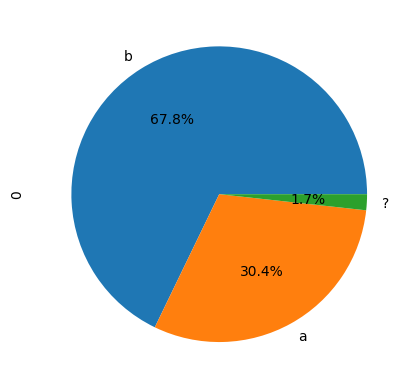

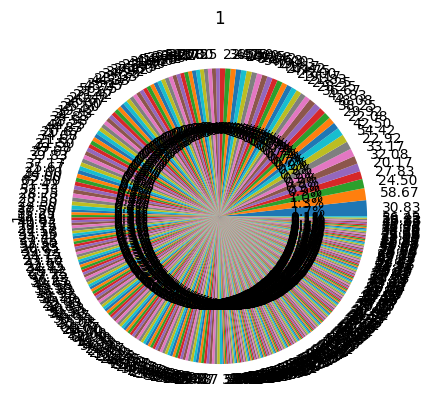

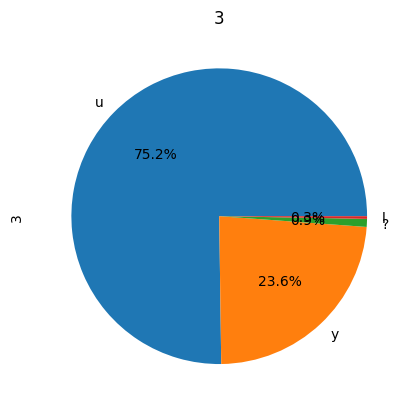

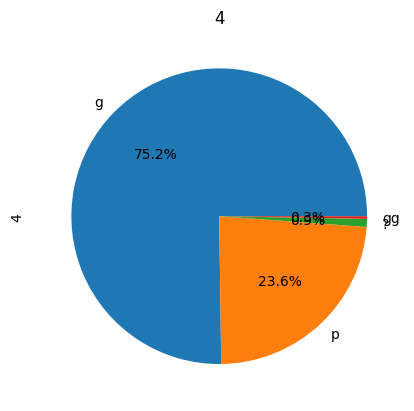

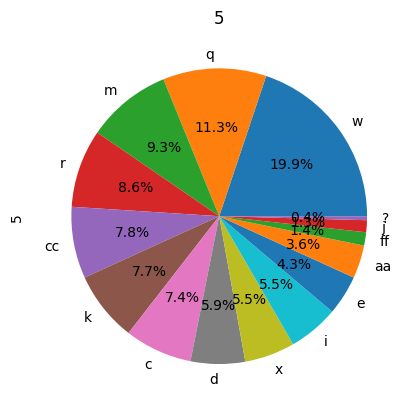

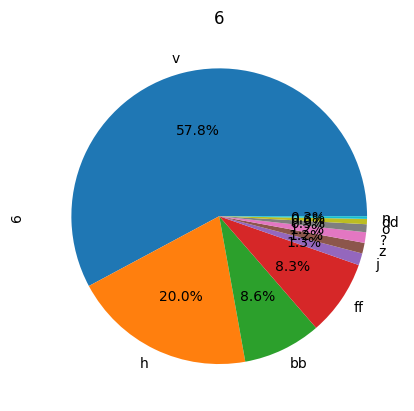

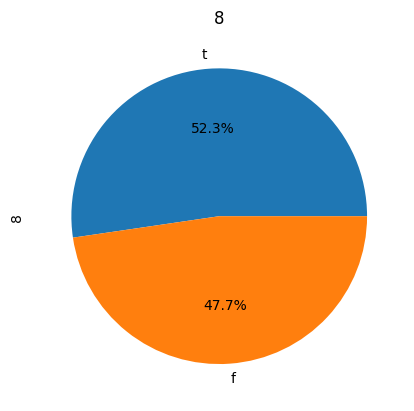

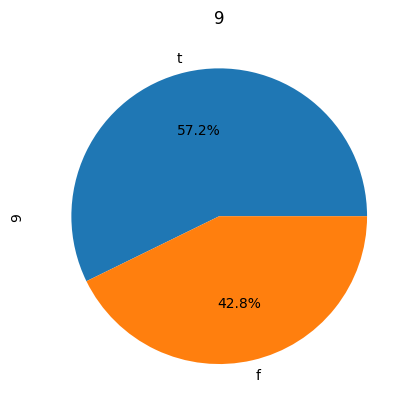

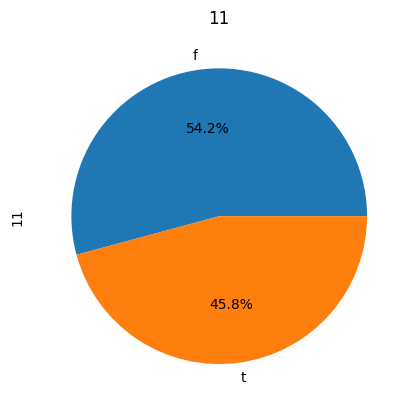

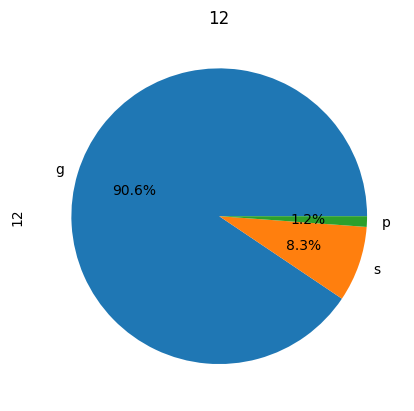

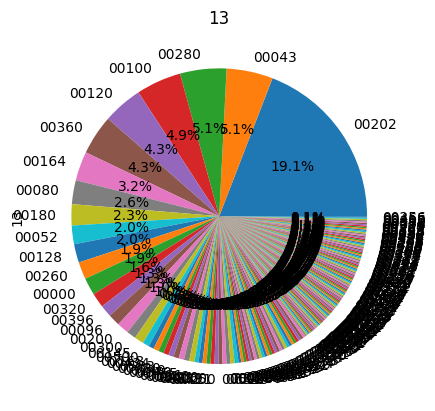

In [8]:
# Graphs for objects/ categorical data
for object in object_list:
    if object not in [15]:
        df[object].value_counts(normalize=True, dropna=False).plot.pie(title=object, labels=df[object].unique(), autopct="%1.1f%%")
        plt.show()
        

## Preprocessing and Cleanning Data
- Convert Data Types
- Replace Missing Values
- Unstructured Data Cleaning for Text, Image, and Audio

### Convert Data Types
! The code below is apply changes specfic to this file and would need to apply the principal to the data per findings in the EDA

In [9]:
# Replace question marks with NaN (This is specific to this test dataset and other values may need to be added)
df = df.replace("?", np.NaN)

# Changing data types
df[1] = df[1].astype('float')
df[13] = np.where(df[13]=='00000', '0', df[13].str.lstrip('0'))
df[13] = df[13].replace('', np.NaN)  # Replace empty strings with NaN before conversion
df[13] = df[13].astype('float').astype('Int64')  # Use 'Int64' (capital "I") to allow NaN in integer columns

# Confirm data type changes
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    Int64  
 14  14      690 non-null    int64  
 15  target  690 non-null    int64  
dtypes: Int64(1), float64(3), int64(3), object(9)
memory usage: 87.0+ KB
None
   0      1      2  3  4  5  6     7  8  9  10 11 12   13   14  target
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  202    0       1
1  a  58.

### Missing Values
For columns with <5% with missing values will be dropped and those with more than 5% will be imputted. 

In [10]:
# Fixed missing parenthesis in the calculation of drop_missing_cutoff_5pct
drop_missing_cutoff_5pct = int(len(df)*0.05)
print("5% of the dataset is {}".format(drop_missing_cutoff_5pct))

# Count the missing values in each column
cols_missing_cnt = df.isna().sum()

# Check for missing value
print('Missing Values Check')
print(cols_missing_cnt)

# Retain a list of columns with a missing value
cols_with_missing_to_drop = cols_missing_cnt[(cols_missing_cnt > 0) & (cols_missing_cnt < drop_missing_cutoff_5pct)].index.tolist()
print("Columns with missing less than 5% are {}".format(cols_with_missing_to_drop))

# Columns with missing great 5%
cols_with_missing_to_impute = cols_missing_cnt[(cols_missing_cnt > 0) & (cols_missing_cnt >= drop_missing_cutoff_5pct)].index.tolist()
print("Columns with missing greater than 5% are {}".format(cols_with_missing_to_impute))

5% of the dataset is 34
Missing Values Check
0         12
1         12
2          0
3          6
4          6
5          9
6          9
7          0
8          0
9          0
10         0
11         0
12         0
13        13
14         0
target     0
dtype: int64
Columns with missing less than 5% are [0, 1, 3, 4, 5, 6, 13]
Columns with missing greater than 5% are []


In [11]:
# Remove values where less than 5% are missing
if len(cols_with_missing_to_drop)>0:
    df = df.dropna(subset=cols_with_missing_to_drop)
    print(df.info())
else:
    print("No missing values dropped.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       653 non-null    object 
 1   1       653 non-null    float64
 2   2       653 non-null    float64
 3   3       653 non-null    object 
 4   4       653 non-null    object 
 5   5       653 non-null    object 
 6   6       653 non-null    object 
 7   7       653 non-null    float64
 8   8       653 non-null    object 
 9   9       653 non-null    object 
 10  10      653 non-null    int64  
 11  11      653 non-null    object 
 12  12      653 non-null    object 
 13  13      653 non-null    Int64  
 14  14      653 non-null    int64  
 15  target  653 non-null    int64  
dtypes: Int64(1), float64(3), int64(3), object(9)
memory usage: 87.4+ KB
None


In [ ]:
# Pairplot to show matrix of variables: histograms and scatterplots
sns.pairplot(df)

In [12]:
# Calculate the mean for numeric columns
numeric_columns = df.columns[(df.dtypes !='object')]
numeric_means = df[numeric_columns].mean()

# Calculate the most frequent value (mode) in each column of cc_apps_train_nans_replaced
column_modes = df.mode().iloc[0]

# Replace mean for missing numeric and mode for object
if len(cols_with_missing_to_impute)>0:
    # Impute Missing values in numeric columns
    for column in df[cols_with_missing_to_impute].columns:
        if df[column].dtype !='object':
            # Convert mean to the appropriate type for the column before filling NA
            if pd.api.types.is_integer_dtype(df[column].dtype):
                df[column] = df[column].fillna(int(numeric_means[column]))
            else:
                df[column] = df[column].fillna(numeric_means[column])
        else:
            df[column] = df[column].fillna(column_modes[column])    
    print(df.info())
else:
    print("No missing values were imputted.")

No missing values were imputted.


## EDA for relationships with the target

### Objects vs Target relationships

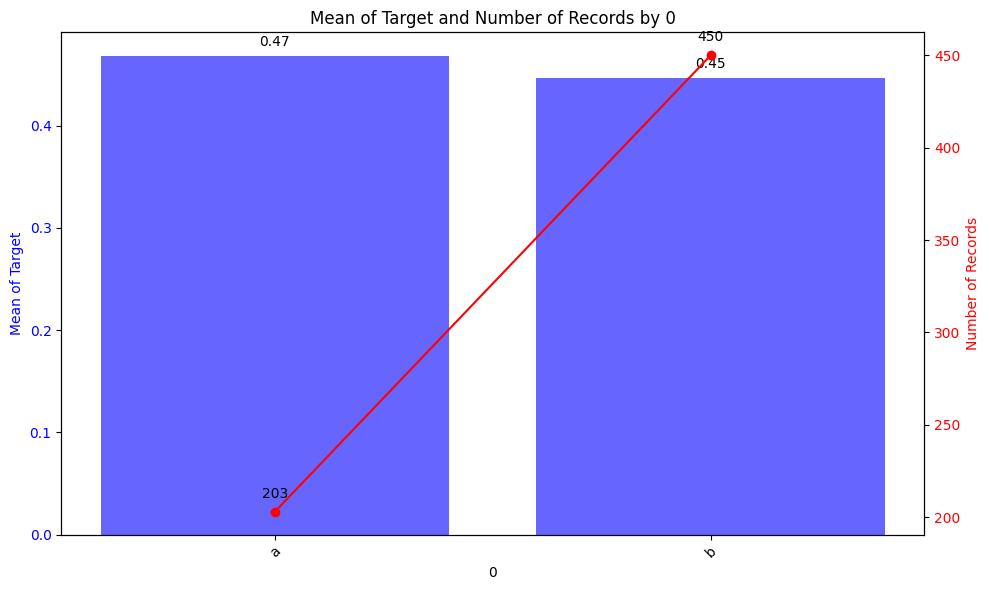

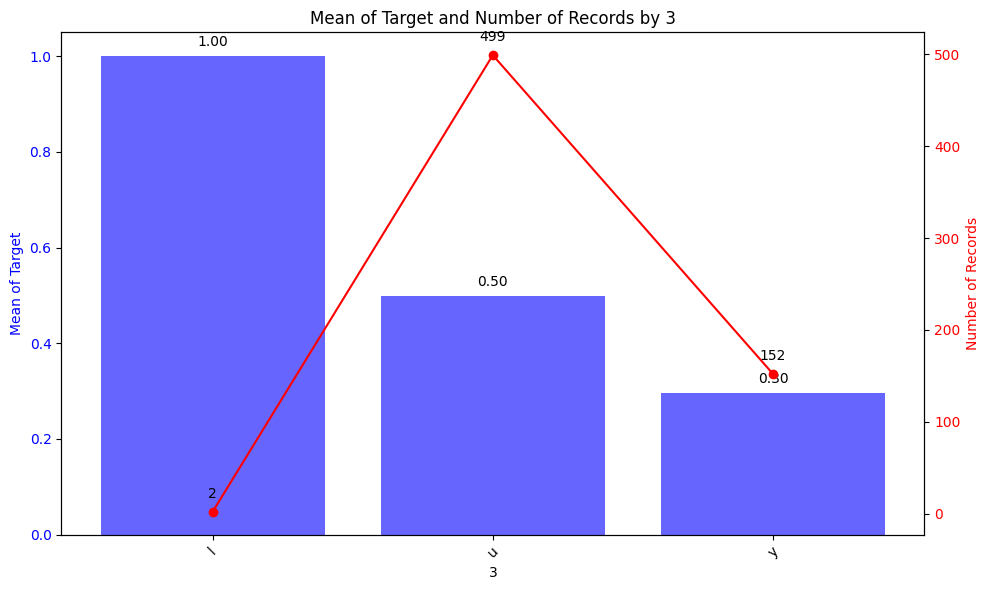

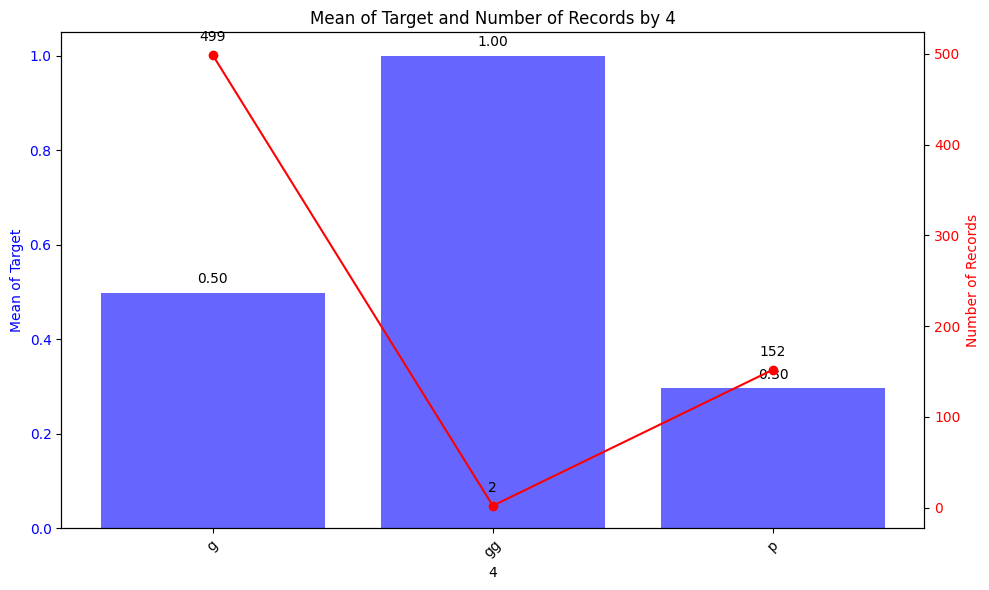

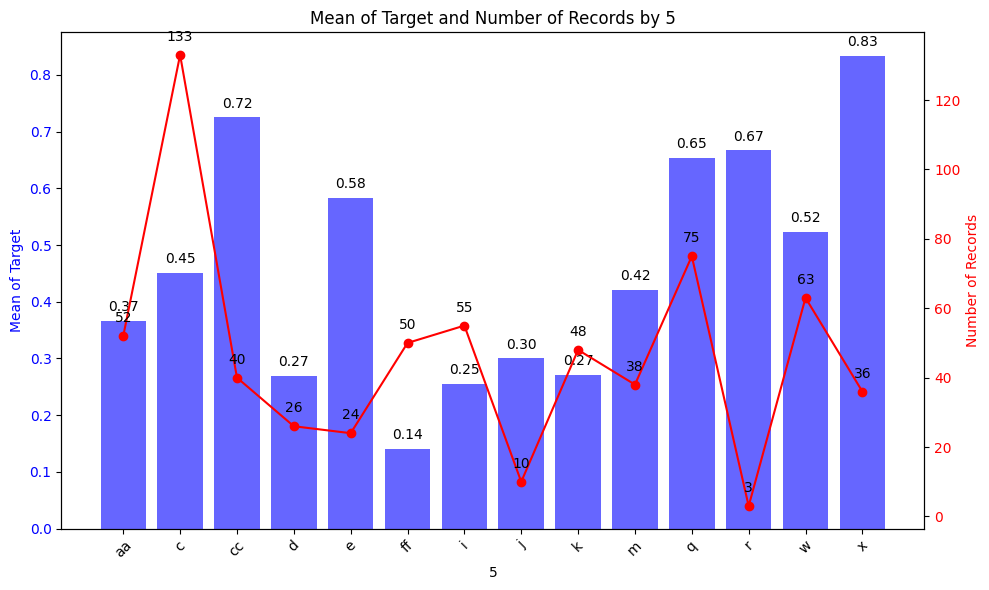

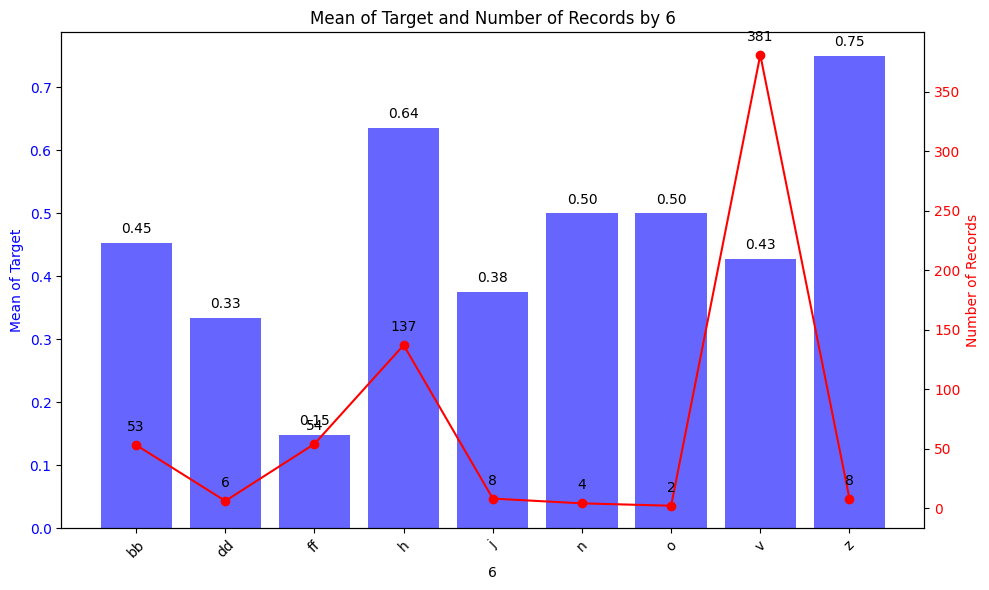

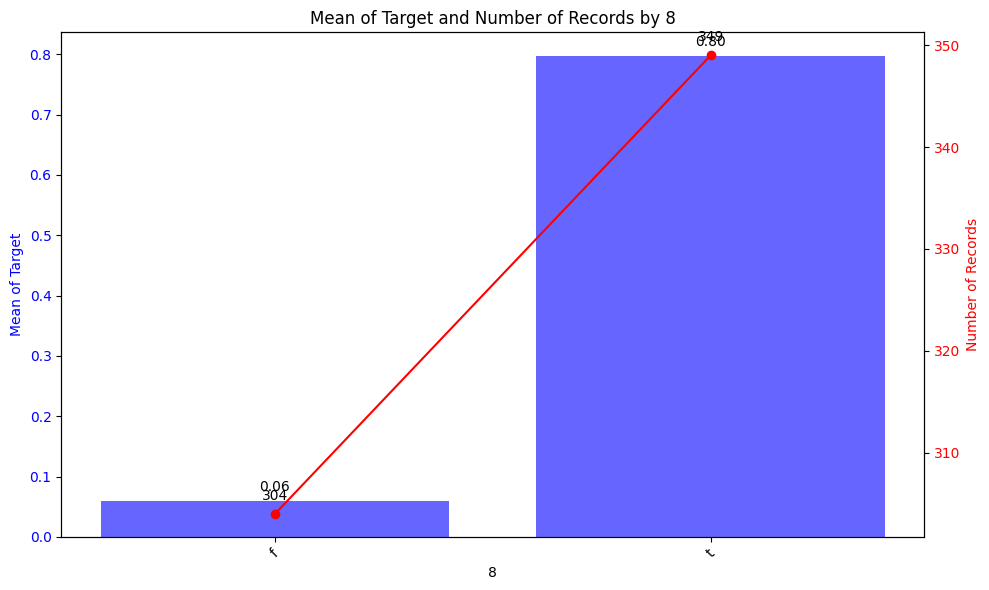

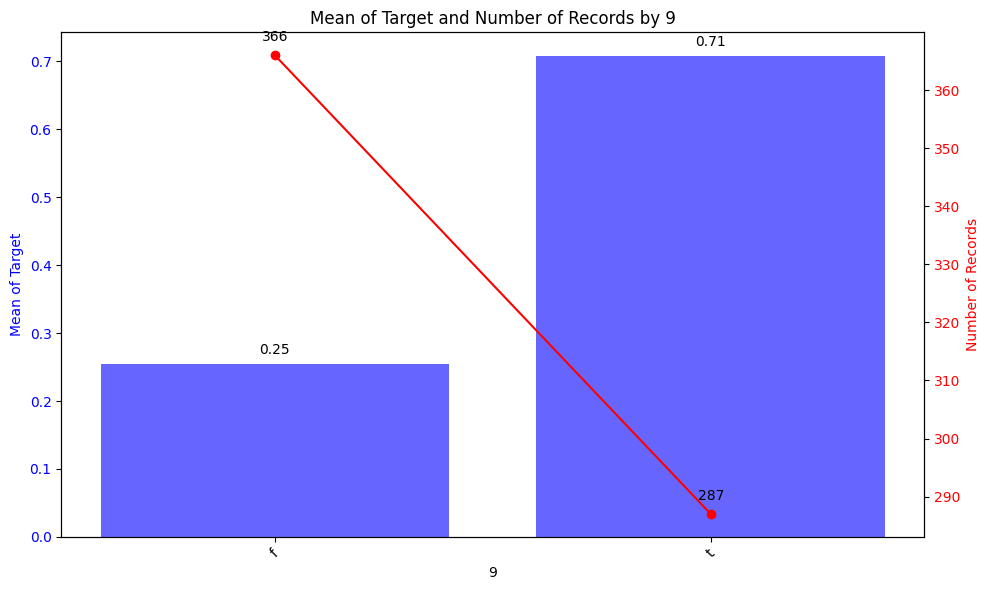

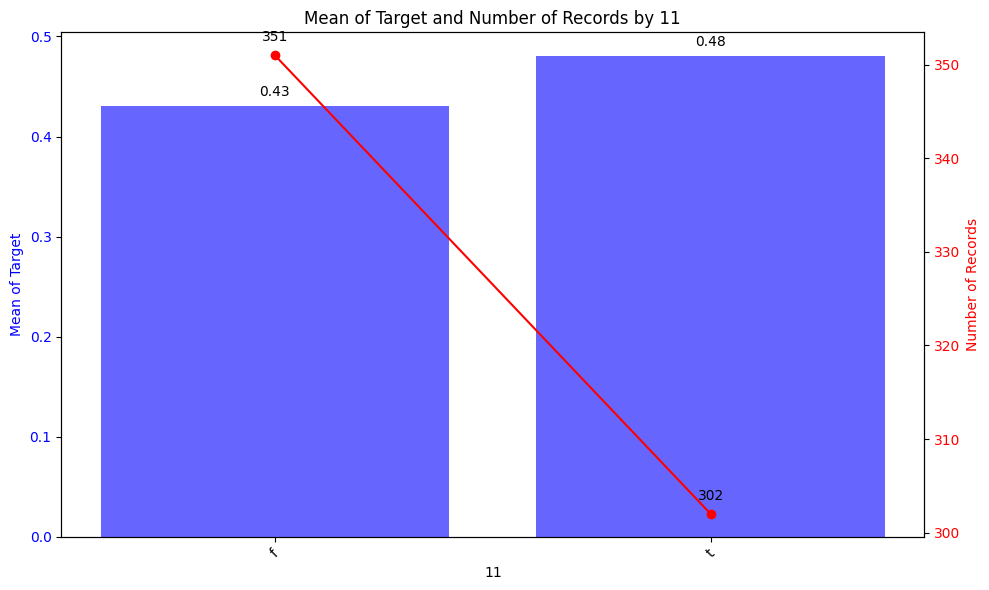

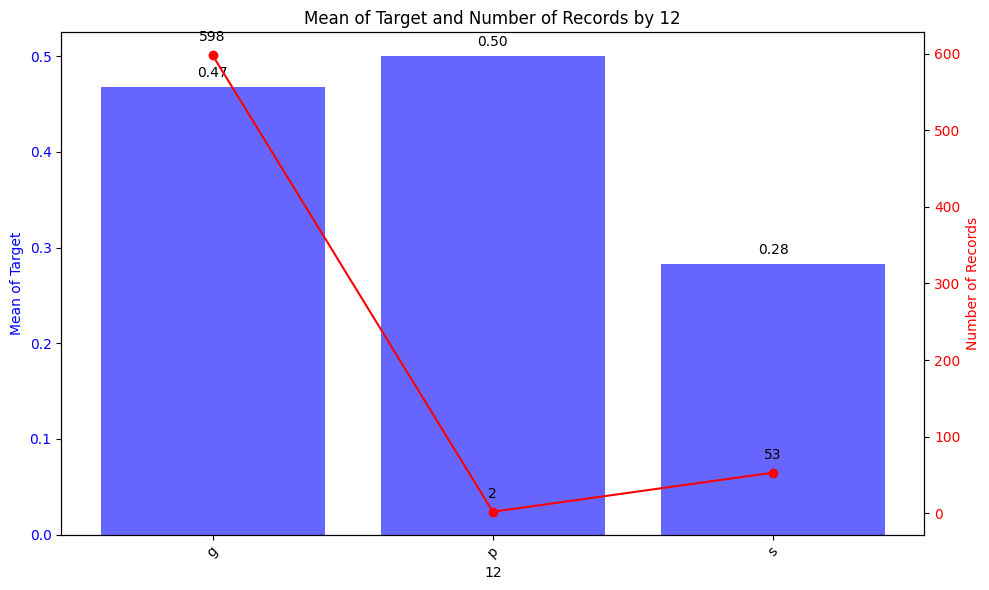

In [13]:
import matplotlib.pyplot as plt

# Loop through each object column and plot the mean of the target by each unique value in the column
for column in df.columns[df.dtypes == 'object']:
    mean_target_by_value = df.groupby(column)['target'].mean()
    count_by_value = df[column].value_counts().reindex(mean_target_by_value.index)  # Get the count for each category
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot mean of the target
    ax1.bar(mean_target_by_value.index, mean_target_by_value.values, color='blue', alpha=0.6, label='Mean of Target')
    ax1.set_title(f'Mean of Target and Number of Records by {column}')
    ax1.set_ylabel('Mean of Target', color='blue')
    ax1.set_xlabel(column)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticklabels(mean_target_by_value.index, rotation=45)
    
    # Create another y-axis for the count
    ax2 = ax1.twinx()
    ax2.plot(count_by_value.index, count_by_value.values, color='red', label='Number of Records', marker='o')
    ax2.set_ylabel('Number of Records', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Display the value above each bar for mean of target
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
    
    # Display the count value next to each point
    for i, value in enumerate(count_by_value.values):
        ax2.annotate(value, 
                     (count_by_value.index[i], value), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center')
    
    fig.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.show()

### Numeric vs Target Relationships

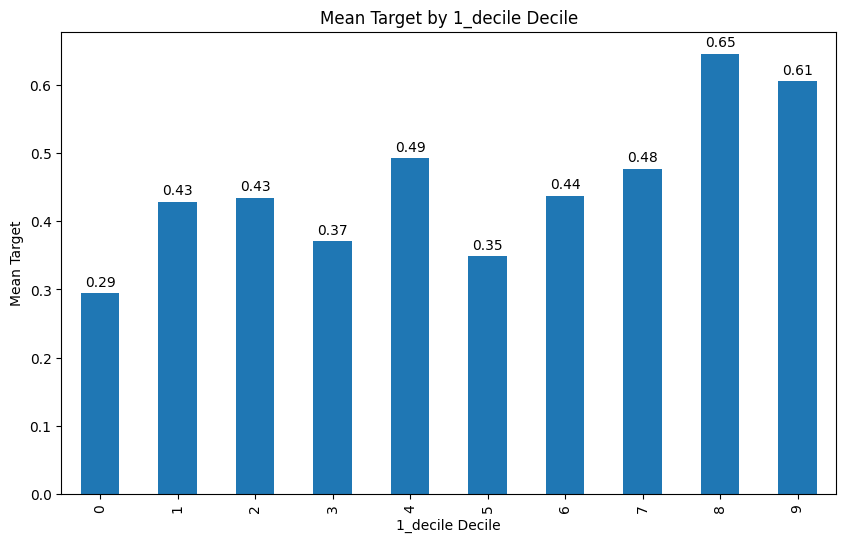

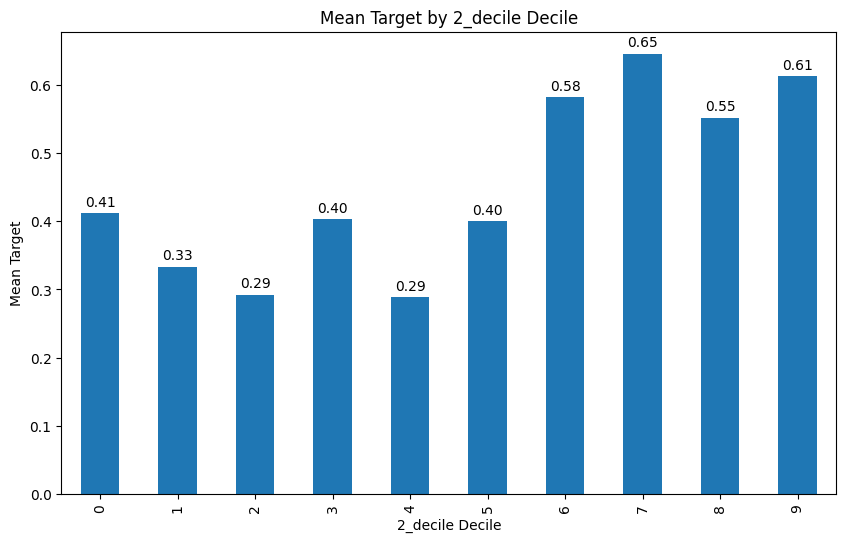

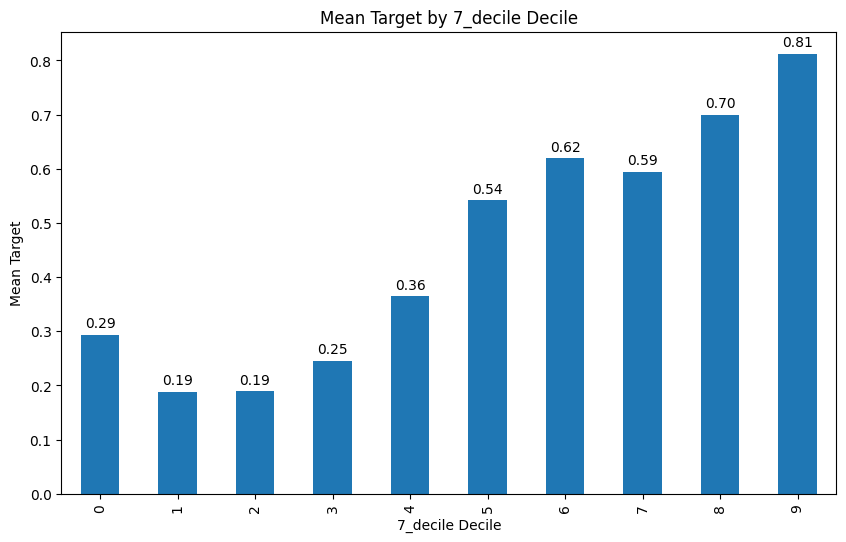

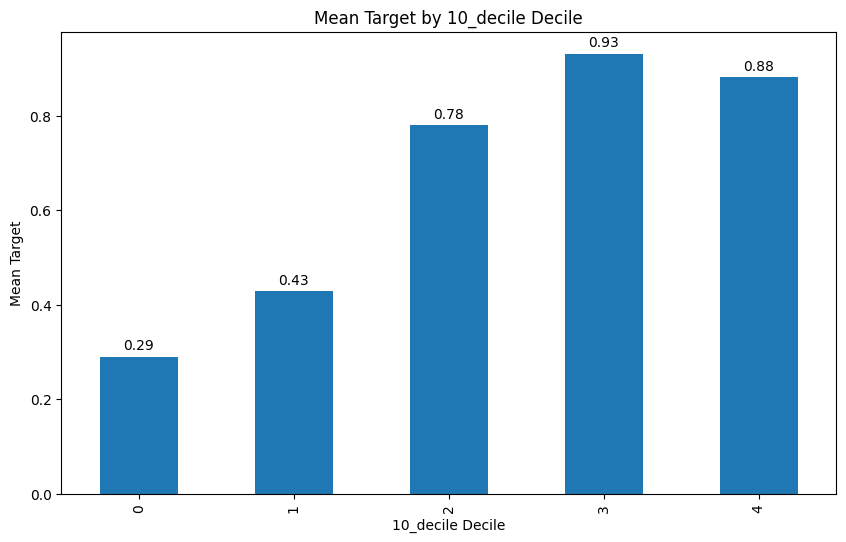

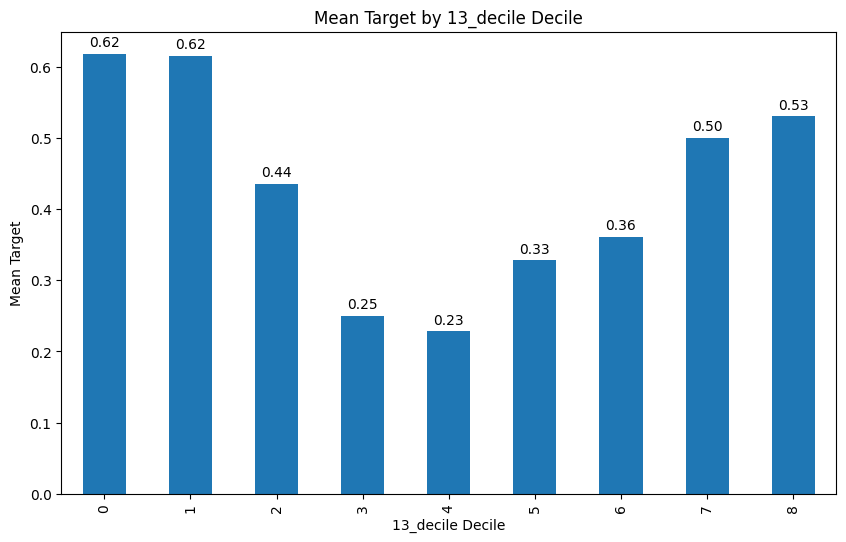

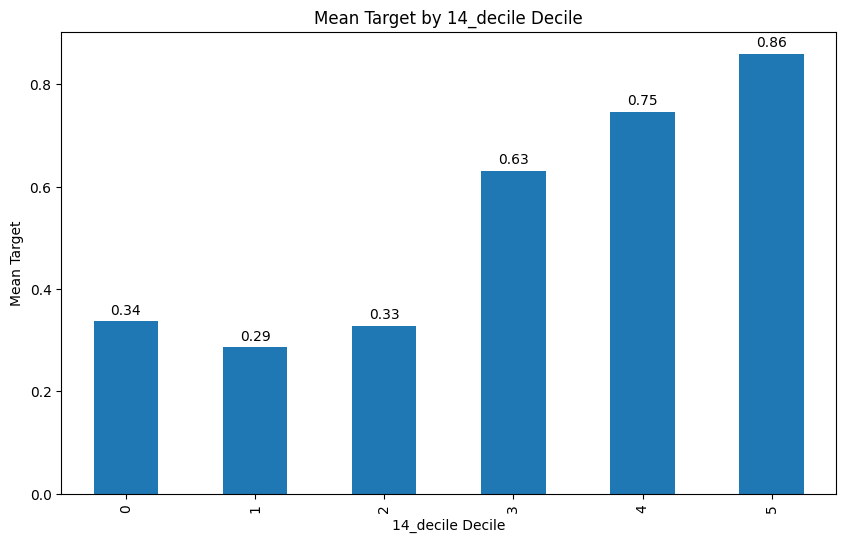

In [14]:
# Identify numeric columns in the dataframe
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove 'target' from the list of numeric columns as we don't want to bin this
numeric_columns.remove('target')

# Create a new dataframe to store binned values and the target
df_binned = pd.DataFrame()

for col in numeric_columns:
    # Bin the numeric columns into deciles
    # Ensure col is converted to string in case it's not
    df_binned[str(col) + '_decile'] = pd.qcut(df[col], 10, duplicates='drop', labels=False)

df_binned['target'] = df['target']  # Add the target column to the binned dataframe

# Calculate the mean of the target for each bin and plot
for col in df_binned.columns[:-1]:  # Exclude the last column which is 'target'
    mean_target_by_bin = df_binned.groupby(col)['target'].mean()
    plt.figure(figsize=(10, 6))
    bars = mean_target_by_bin.plot(kind='bar')
    plt.title(f'Mean Target by {col} Decile')
    plt.xlabel(f'{col} Decile')
    plt.ylabel('Mean Target')
    
    # Add the mean value above each bar
    for bar in bars.patches:
        plt.annotate(format(bar.get_height(), '.2f'), 
                     (bar.get_x() + bar.get_width() / 2, 
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')
    plt.show()

### Evaluation Correlation of features for Multicolinarity

### Correlation

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

# Create a correlation matrix 
# ! Try this version
corr_matrix.style.background_gradient()

## Prep Data for Modeling
- Dummies One-Hot Coding
- Scaling numeric data
- Multicolinarity
- Clustering Catagorical 

### Dummies One-Hot Encoding

In [15]:
# Create music_dummies (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of df with dummies: {}".format(df.shape))

Shape of df with dummies: (653, 38)


## Split Data to Train and Test
- Train and Test
- Cross Validation

### Split to Train and Test

In [16]:
# Breakout the target (y) and features (X)
X = df.drop([target], axis=1).values
y = df[target].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

### Scale the X features

In [ ]:
# Standardization of the dataframe
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Principal Component Analysis (PCA)

In [ ]:
# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(X_train_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance and draw a dashed line at 0.85. Pick the n_components first greater than 85%
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')


In [ ]:
# Perform PCA with the chosen number of components and project data onto components
pca = pca(n_components=6, random_state=10)

# Fit and transform the scaled training features using pca
X_train= pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
X_test = pca.transform(scaled_test_features)

## Model
* Classification
    - KNeighbors
    - Logistic Regression
    - Decision Tree
    - Random Forest
    - Neural Networks
    - Boosting
        - Ada
        - Gradient
        - Stochastic
    - Ensembles (Multiple Models from same training dataset)
* Regression
    - Linear Regression + Lasso, Ridge
    - Decision Tree
    - Random Forest



### Fit and Predict Classification Models 

In [17]:
# Define a dict of models to be applied and to capture the results
models ={"KNeighbors" : KNeighborsClassifier(),
        "LogisticRegression" : LogisticRegression(),
        "DecisionTree" : DecisionTreeClassifier(),
        "RandomForest" : RandomForestClassifier(),
        "AdaBoost" : AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100),
        "GradientBoosting" : GradientBoostingClassifier(n_estimators=100, max_depth=1)}
results = []

# Metrics for Classification
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]

In [18]:
# Initialize an empty list to store results
results_df = []

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]

  # Show Parameters
  print(name)
  params = model.get_params()  
  print(params)  

  # Calculate metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')
  roc_auc = roc_auc_score(y_test, y_pred_probs)  
      
  # Append the results to the list
  results_df.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC AUC": roc_auc, "Params" : params})

  # Calculate the confusion matrix
  print(confusion_matrix(y_test, y_pred))

  # Calculate the classification report
  print(classification_report(y_test, y_pred))


# Convert the list to a DataFrame
results_df = pd.DataFrame(results_df)

# Display the results
results_df

KNeighbors
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
LogisticRegression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
DecisionTree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
RandomForest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_spli

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Params
0,KNeighbors,0.732824,0.693548,0.728814,0.710744,0.801907,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
1,LogisticRegression,0.870229,0.838710,0.881356,0.859504,0.940443,"{'C': 1.0, 'class_weight': None, 'dual': False..."
2,DecisionTree,0.778626,0.741935,0.779661,0.760331,0.778719,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
3,RandomForest,0.885496,0.866667,0.881356,0.873950,0.944680,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
4,AdaBoost,0.847328,0.782609,0.915254,0.843750,0.923258,"{'algorithm': 'SAMME.R', 'base_estimator__ccp_..."
5,GradientBoosting,0.870229,0.818182,0.915254,0.864000,0.952684,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."


### Ensemble Model

In [19]:
# Instantiate a VotingClassifier vc
model = VotingClassifier(estimators=list(models.items()))     

# Fit the model to the training data
model.fit(X_train, y_train)
  
# Make predictions on the test set
y_pred = model.predict(X_test)

# Show Parameters
print('Ensemble')
params = model.get_params()  
print(params)  

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = np.NAN
      
# Append the results to the list
results_df = results_df.append({"Model": "Ensemble", "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC AUC": roc_auc, "Params" : params}, ignore_index=True)

# Display the results
results_df

Ensemble
{'estimators': [('KNeighbors', KNeighborsClassifier()), ('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)), ('GradientBoosting', GradientBoostingClassifier(max_depth=1))], 'flatten_transform': True, 'n_jobs': None, 'verbose': False, 'voting': 'hard', 'weights': None, 'KNeighbors': KNeighborsClassifier(), 'LogisticRegression': LogisticRegression(), 'DecisionTree': DecisionTreeClassifier(), 'RandomForest': RandomForestClassifier(), 'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100), 'GradientBoosting': GradientBoostingClassifier(max_depth=1), 'KNeighbors__algorithm': 'auto', 'KNeighbors__leaf_size': 30, 'KNeighbors__metric': 'minkowski', 'KNeighbors__metric_params': None, 'KNeighbors__n_jobs': None, 'KNeighbor

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Params
0,KNeighbors,0.732824,0.693548,0.728814,0.710744,0.801907,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
1,LogisticRegression,0.870229,0.838710,0.881356,0.859504,0.940443,"{'C': 1.0, 'class_weight': None, 'dual': False..."
2,DecisionTree,0.778626,0.741935,0.779661,0.760331,0.778719,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
3,RandomForest,0.885496,0.866667,0.881356,0.873950,0.944680,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
4,AdaBoost,0.847328,0.782609,0.915254,0.843750,0.923258,"{'algorithm': 'SAMME.R', 'base_estimator__ccp_..."
5,GradientBoosting,0.870229,0.818182,0.915254,0.864000,0.952684,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
6,Ensemble,0.877863,0.852459,0.881356,0.866667,NaN,"{'estimators': [('KNeighbors', KNeighborsClass..."


### Select Best Model
Compare results from both the first model run and the cross-vliadation to select the best model

In [20]:
# Rank the values in each column except for "Model"
ranked_results_df = results_df.set_index('Model')[metrics[:-1]].rank(ascending=False)

# Sum the ranks into a new column "Total Rank"
ranked_results_df['Total Rank'] = ranked_results_df.sum(axis=1)

# Reset index to bring "Model" back as a column
ranked_results_df = ranked_results_df.reset_index().sort_values(by='Total Rank')

best_model = ranked_results_df[ranked_results_df['Total Rank']==min(ranked_results_df['Total Rank'])]['Model']

print("Best Model is ",best_model.iloc[0])

ranked_results_df

Best Model is  RandomForest


,Model,Accuracy,Precision,Recall,F1 Score,Total Rank
3,RandomForest,1.0,1.0,4.0,1.0,7.0
6,Ensemble,2.0,2.0,4.0,2.0,10.0
5,GradientBoosting,3.5,4.0,1.5,3.0,12.0
1,LogisticRegression,3.5,3.0,4.0,4.0,14.5
4,AdaBoost,5.0,5.0,1.5,5.0,16.5
2,DecisionTree,6.0,6.0,6.0,6.0,24.0
0,KNeighbors,7.0,7.0,7.0,7.0,28.0


### Evaluate Classification Models

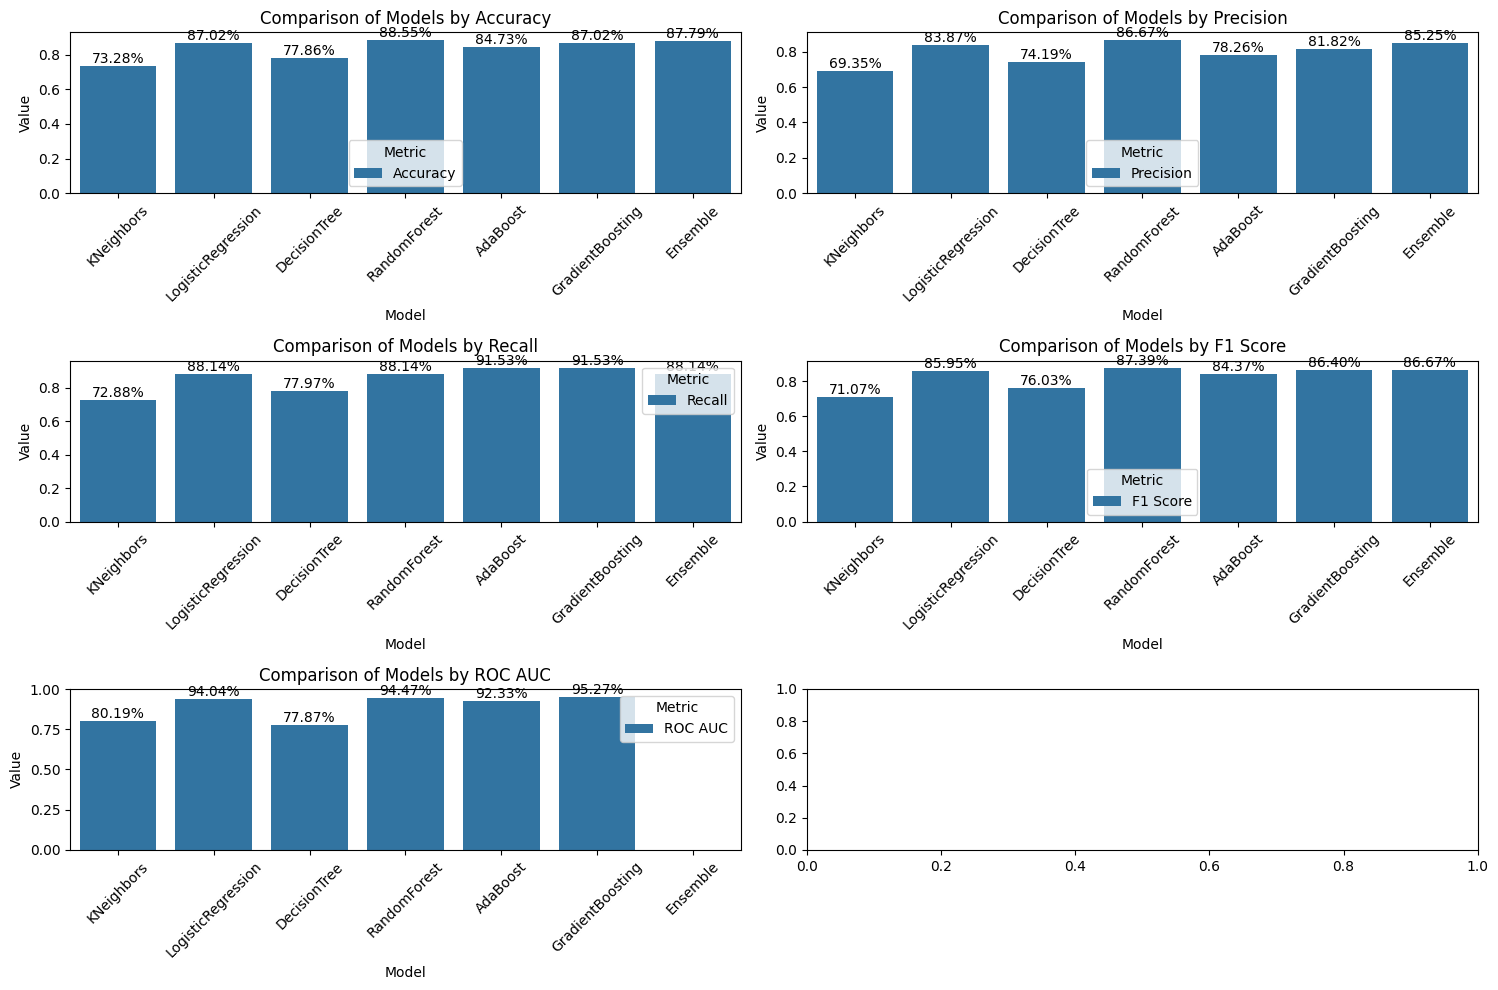

In [21]:
# We need to melt results_df to make it suitable for sns.catplot
melted_results_df = results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Value")

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Now, we plot the data for each metric in a 3 by 2 grid
for i, metric in enumerate(metrics):
    filtered_df = melted_results_df[melted_results_df['Metric'] == metric]
    sns.barplot(x="Model", y="Value", hue="Metric", data=filtered_df, ax=axes[i])
    axes[i].set_title(f'Comparison of Models by {metric}')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels above each bar in percentage format
    for container in axes[i].containers:
        labels = [f'{v.get_height():.2%}' for v in container]
        axes[i].bar_label(container, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

### Kfold and Cross-Validation
This is to observe if there is any bias with the splitting of the data to train and test

Scoring options for cross_score_val scoring = 'accuracy' (default), 'balanced_accuracy', 'f1', 'roc_auc', 'neg_log_loss', 'precision', 'recall'

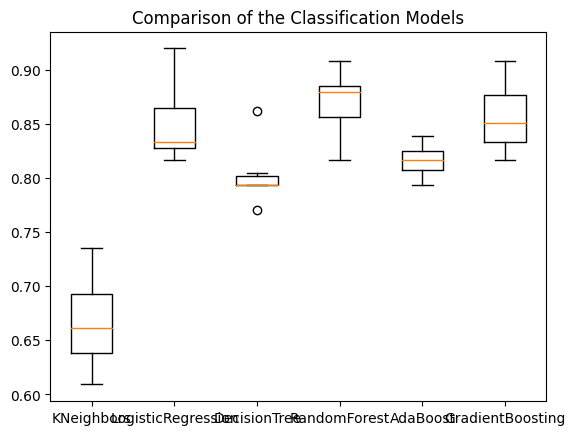

In [22]:
# Compare Models with Kfold and cross-validation (Find out more about this)
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=9, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.title("Comparison of the Classification Models")
plt.boxplot(results, labels=models.keys())
plt.show()


## Hyperparameter Tuning
- Bagging: Bootstrap Aggregation (Applies one model on different training sets) with Out Of Bag (OOB)


### Hyperparameter Tuning with GridSearch

In [23]:
# Parameters for the best model
print("Best Model is ",best_model.iloc[0])
results_df[results_df['Model']==best_model.iloc[0]]['Params'].iloc[0]

Best Model is  RandomForest


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:


# Random Forest Hyperparameter Tuning
rf = RandomForestClassifier()

# Define the dictionary 'params_rf'
params_rf = {'n_estimators' : [100, 350, 500],
            'max_features' : ['log2', 'auto', 'sqrt'],
            'min_samples_leaf' : [2, 10, 30]}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='roc_auc',
                       cv=kf,
                       verbose=1,
                       n_jobs=-1)

# Fit
grid_rf.fit(X_train, y_train)
print(f"Best Estimator : {grid_rf.best_estimator_}")
print(f"Best Params : {grid_rf.best_params_}")
print(f"Best Score : {grid_rf.best_score_}")

# Extract the best estimator
best_model_hp = grid_rf.best_estimator_

# Predict the test set probabilities of the positive class
y_pred = best_model_hp.predict(X_test)
y_pred_proba = best_model_hp.predict_proba(X_test)[:,1] 

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

# Compute Score
test_score = grid_rf.score(X_test, y_test)
print("Score ", test_score)

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))


Fitting 6 folds for each of 27 candidates, totalling 162 fits
Best Estimator : RandomForestClassifier(max_features='log2', min_samples_leaf=2)
Best Params : {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}
Best Score : 0.9332456338437775
Test set ROC AUC score: 0.956
Score  0.9562146892655367
[[64  8]
 [ 8 51]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        72
           1       0.86      0.86      0.86        59

    accuracy                           0.88       131
   macro avg       0.88      0.88      0.88       131
weighted avg       0.88      0.88      0.88       131



## Evaluate Final Model
- Classification
    - Accuracy
    - Confusion Matrix
    - ROC AUC
- Regression
    - R Square
    - Root Mean Squared Error (RMSE)

## Model Implementation

## Performance Tracking